In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds_map(process)

In [ ]:
#create cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D (64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D (128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add (Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.0858 - accuracy: 0.6090 - val_loss: 0.5688 - val_accuracy: 0.7214
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5408 - accuracy: 0.7340 - val_loss: 0.5278 - val_accuracy: 0.7576
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4550 - accuracy: 0.7873 - val_loss: 0.4959 - val_accuracy: 0.7588
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3988 - accuracy: 0.8208 - val_loss: 0.4438 - val_accuracy: 0.7882
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3452 - accuracy: 0.8468 - val_loss: 0.5066 - val_accuracy: 0.7698
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2852 - accuracy: 0.8780 - val_loss: 0.4495 - val_accuracy: 0.8110
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2196 - accuracy: 0.9082 - val_loss: 0.4997 - val_ac

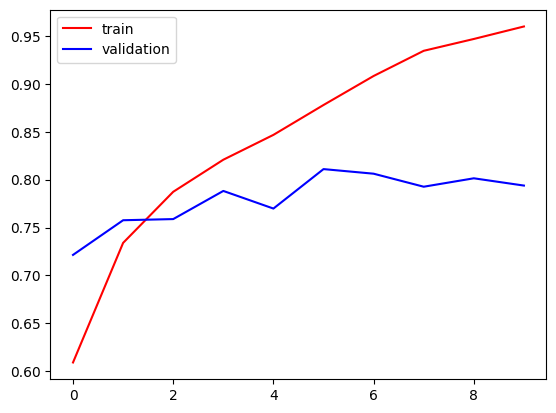

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

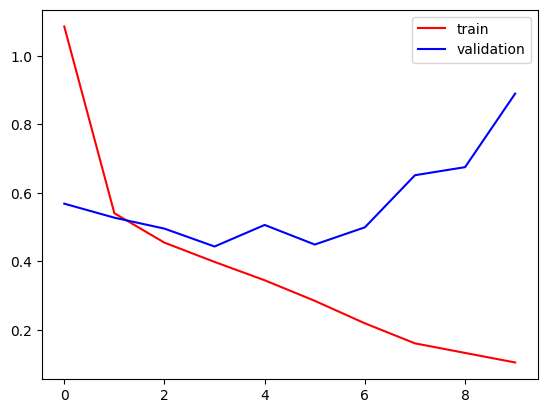

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.jpeg')

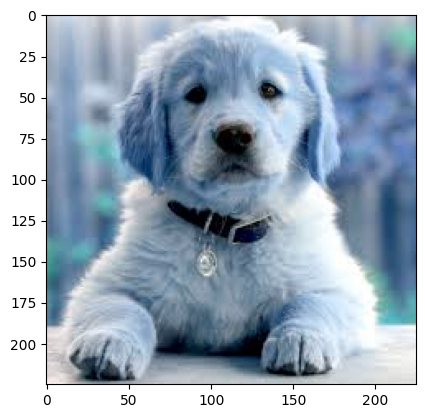

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(225, 225, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[1.8313138e-08]], dtype=float32)

In [ ]:
test_img=cv2.imread('/content/cat.jpg')

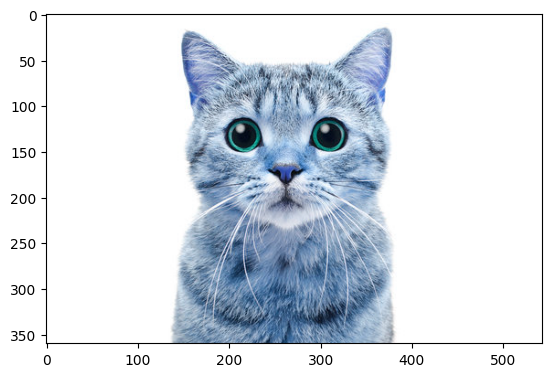

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(360, 543, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

NameError: ignored